In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
import pandas as pd

# Lecture du fichier Excel
file_path = "../data/perf_kilo.xlsx"
try:
    df = pd.read_excel(file_path, sheet_name="distance")
    print(df.head())
except Exception as e:
    print(f"Une erreur s'est produite : {e}")


         day  distance(m)
0 2021-06-18        333.0
1 2021-06-19       8400.0
2 2021-06-20       4000.0
3 2021-06-21       4900.0
4 2021-06-22        640.0


In [3]:
df.describe()

,day,distance(m)
count,1308,1246.000000
mean,2023-04-02 12:00:00,2909.093900
min,2021-06-18 00:00:00,9.000000
25%,2022-05-10 18:00:00,1100.000000
50%,2023-04-02 12:00:00,2300.000000
75%,2024-02-23 06:00:00,4200.000000
max,2025-01-15 00:00:00,15600.000000
std,NaN,2434.651484


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          1308 non-null   datetime64[ns]
 1   distance(m)  1246 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.6 KB


In [5]:
len(df['distance(m)'].isna())

1308

In [6]:
df['distance(m)'].count()

np.int64(1246)

In [7]:
print(df.iloc[1245])

day            2024-11-14 00:00:00
distance(m)                  900.0
Name: 1245, dtype: object


In [8]:
dist = df.iloc[0:1246]
dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          1246 non-null   datetime64[ns]
 1   distance(m)  1246 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.6 KB


In [9]:
dist.tail()

,day,distance(m)
1241,2024-11-10,2000.0
1242,2024-11-11,2700.0
1243,2024-11-12,1100.0
1244,2024-11-13,2500.0
1245,2024-11-14,900.0


In [10]:
from utils import data_import

In [11]:
# Appel de la fonction avec un chemin de fichier
file_path = "../data/perf_kilo.xlsx"
data = data_import(file_path)

if data is not None:
    print("Importation réussie !")
else:
    print("Échec de l'importation.")


         day  distance(m)
0 2021-06-18        333.0
1 2021-06-19       8400.0
2 2021-06-20       4000.0
3 2021-06-21       4900.0
4 2021-06-22        640.0
Importation réussie !


In [12]:
from utils import data_import, removed

# Chemin vers le fichier Excel
file_path = "../data/perf_kilo.xlsx"

# Étape 1 : Importer les données
df = data_import(file_path)

# Étape 2 : Nettoyer les données en supprimant les lignes vides
cleaned_df = removed(df)

# Affichage du résultat final
if cleaned_df is not None:
    print("\nDataFrame nettoyé :")
    print(cleaned_df)


         day  distance(m)
0 2021-06-18        333.0
1 2021-06-19       8400.0
2 2021-06-20       4000.0
3 2021-06-21       4900.0
4 2021-06-22        640.0
62 ligne(s) vide(s) supprimée(s).




DataFrame nettoyé :
            day  distance(m)
0    2021-06-18        333.0
1    2021-06-19       8400.0
2    2021-06-20       4000.0
3    2021-06-21       4900.0
4    2021-06-22        640.0
...         ...          ...
1241 2024-11-10       2000.0
1242 2024-11-11       2700.0
1243 2024-11-12       1100.0
1244 2024-11-13       2500.0
1245 2024-11-14        900.0

[1246 rows x 2 columns]


In [13]:
from datetime import datetime

def determine_season(day):
    # Définir les intervalles saisonniers
    summer_intervals = [
        (datetime(2021, 6, 18), datetime(2021, 9, 20)),
        (datetime(2022, 6, 21), datetime(2022, 9, 20)),
        (datetime(2023, 6, 21), datetime(2023, 9, 20)),
        (datetime(2024, 6, 21), datetime(2024, 9, 20)),
    ]

    autumn_intervals = [
        (datetime(2021, 9, 21), datetime(2021, 12, 20)),
        (datetime(2022, 9, 21), datetime(2022, 12, 20)),
        (datetime(2023, 9, 21), datetime(2023, 12, 20)),
        (datetime(2024, 9, 21), datetime(2024, 11, 14)),  # Fin limitée à 14/11/2024
    ]

    winter_intervals = [
        (datetime(2021, 12, 21), datetime(2022, 3, 20)),
        (datetime(2022, 12, 21), datetime(2023, 3, 20)),
        (datetime(2023, 12, 21), datetime(2024, 3, 20)),
    ]

    spring_intervals = [
        (datetime(2022, 3, 21), datetime(2022, 6, 20)),
        (datetime(2023, 3, 21), datetime(2023, 6, 20)),
        (datetime(2024, 3, 21), datetime(2024, 6, 20)),
    ]

    # Vérifier dans quelle saison la date se trouve
    for start, end in summer_intervals:
        if start <= day <= end:
            return "Été"
    for start, end in autumn_intervals:
        if start <= day <= end:
            return "Automne"
    for start, end in winter_intervals:
        if start <= day <= end:
            return "Hiver"
    for start, end in spring_intervals:
        if start <= day <= end:
            return "Printemps"

    return "Date hors période spécifiée"


In [14]:
# Appliquer la fonction determine_season à la colonne 'day'
cleaned_df['season'] = cleaned_df['day'].apply(determine_season)

# Afficher le DataFrame avec les saisons
print(cleaned_df)

            day  distance(m)   season
0    2021-06-18        333.0      Été
1    2021-06-19       8400.0      Été
2    2021-06-20       4000.0      Été
3    2021-06-21       4900.0      Été
4    2021-06-22        640.0      Été
...         ...          ...      ...
1241 2024-11-10       2000.0  Automne
1242 2024-11-11       2700.0  Automne
1243 2024-11-12       1100.0  Automne
1244 2024-11-13       2500.0  Automne
1245 2024-11-14        900.0  Automne

[1246 rows x 3 columns]


/tmp/ipykernel_2340/1904297500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['season'] = cleaned_df['day'].apply(determine_season)


In [15]:
cleaned_df.head()

,day,distance(m),season
0,2021-06-18,333.0,Été
1,2021-06-19,8400.0,Été
2,2021-06-20,4000.0,Été
3,2021-06-21,4900.0,Été
4,2021-06-22,640.0,Été


In [16]:
# Renommer la colonne 'distance(m)' en 'distance'
cleaned_df.rename(columns={'distance(m)': 'distance'}, inplace=True)

# Afficher le DataFrame mis à jour
print(cleaned_df)

            day  distance   season
0    2021-06-18     333.0      Été
1    2021-06-19    8400.0      Été
2    2021-06-20    4000.0      Été
3    2021-06-21    4900.0      Été
4    2021-06-22     640.0      Été
...         ...       ...      ...
1241 2024-11-10    2000.0  Automne
1242 2024-11-11    2700.0  Automne
1243 2024-11-12    1100.0  Automne
1244 2024-11-13    2500.0  Automne
1245 2024-11-14     900.0  Automne

[1246 rows x 3 columns]


/tmp/ipykernel_2340/2949933125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.rename(columns={'distance(m)': 'distance'}, inplace=True)


## EDA

/tmp/ipykernel_2340/1709425778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['year'] = cleaned_df['day'].dt.year


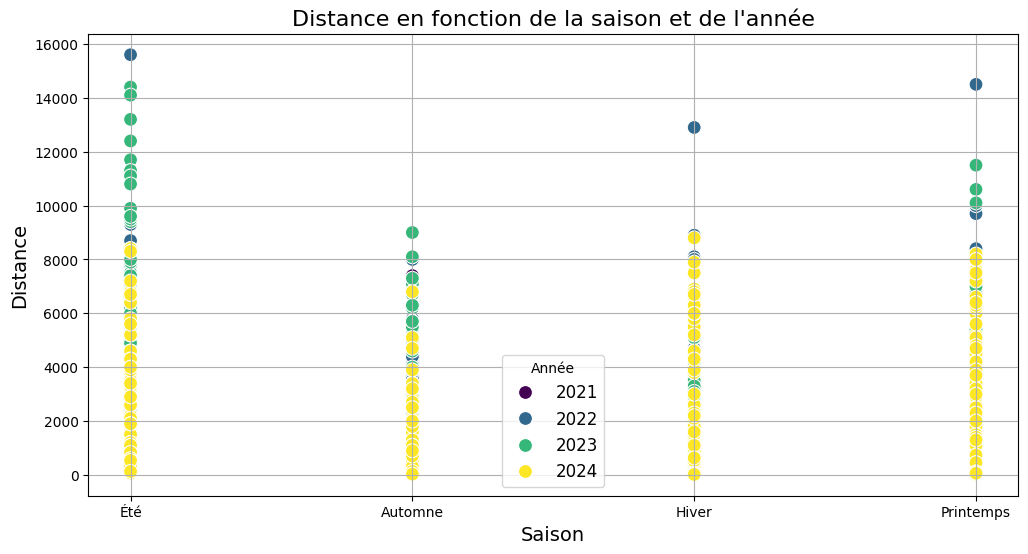

In [18]:
# Extraire l'année de la colonne 'day'
cleaned_df['year'] = cleaned_df['day'].dt.year

# Visualisation des données
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_df, x='season', y='distance', hue='year', palette='viridis', s=100)

# Ajouter des détails au graphique
plt.title('Distance en fonction de la saison et de l\'année', fontsize=16)
plt.xlabel('Saison', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.legend(title='Année', fontsize=12)
plt.grid(True)
plt.show()

### Année 2021

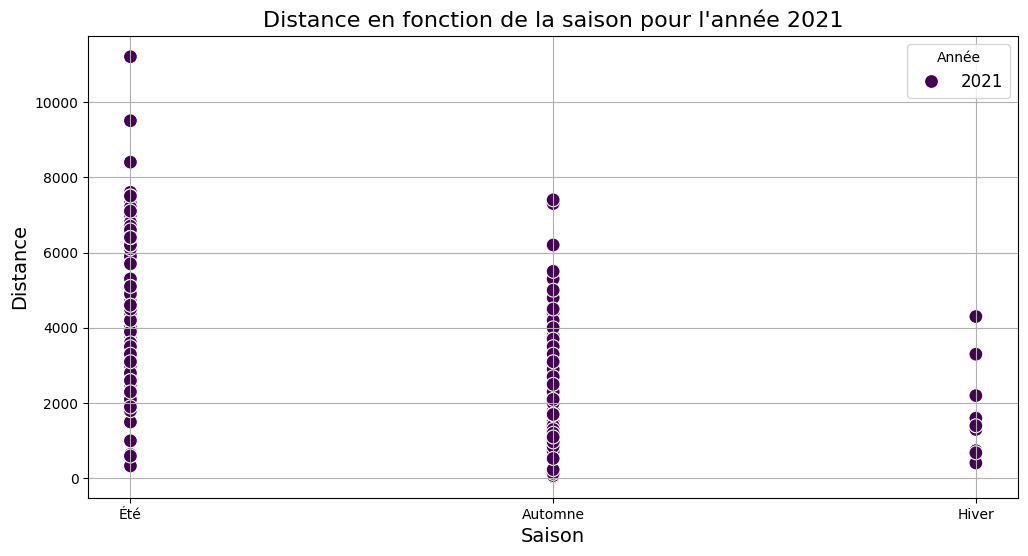

In [19]:
# Filtrer les données pour l'année 2021
cleaned_df_2021 = cleaned_df[cleaned_df['year'] == 2021]

# Visualisation des données pour 2021
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_df_2021, x='season', y='distance', hue='year', palette='viridis', s=100)

# Ajouter des détails au graphique
plt.title('Distance en fonction de la saison pour l\'année 2021', fontsize=16)
plt.xlabel('Saison', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.legend(title='Année', fontsize=12)
plt.grid(True)
plt.show()

### Année 2022

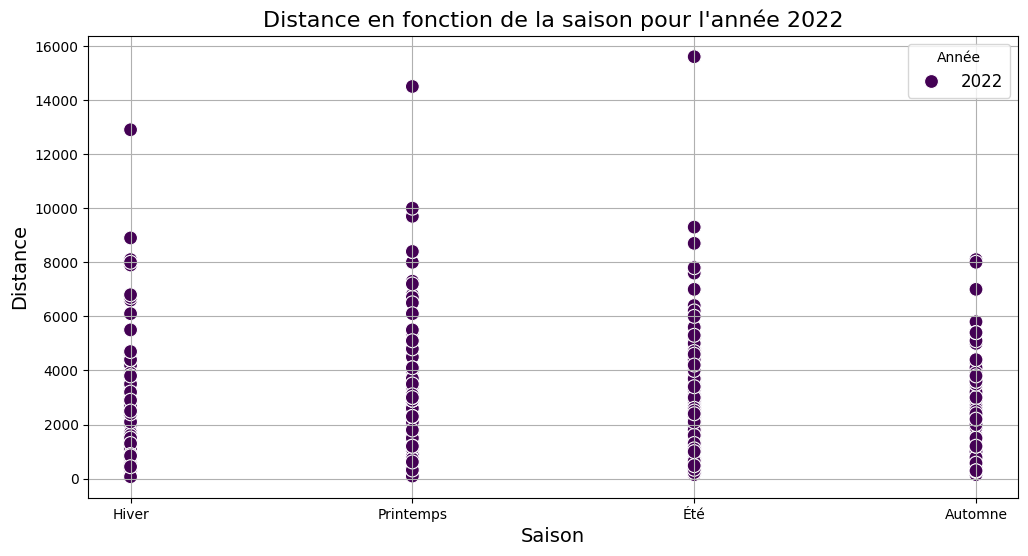

In [20]:
# Filtrer les données pour l'année 2022
cleaned_df_2022 = cleaned_df[cleaned_df['year'] == 2022]

# Visualisation des données pour 2022
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_df_2022, x='season', y='distance', hue='year', palette='viridis', s=100)

# Ajouter des détails au graphique
plt.title('Distance en fonction de la saison pour l\'année 2022', fontsize=16)
plt.xlabel('Saison', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.legend(title='Année', fontsize=12)
plt.grid(True)
plt.show()

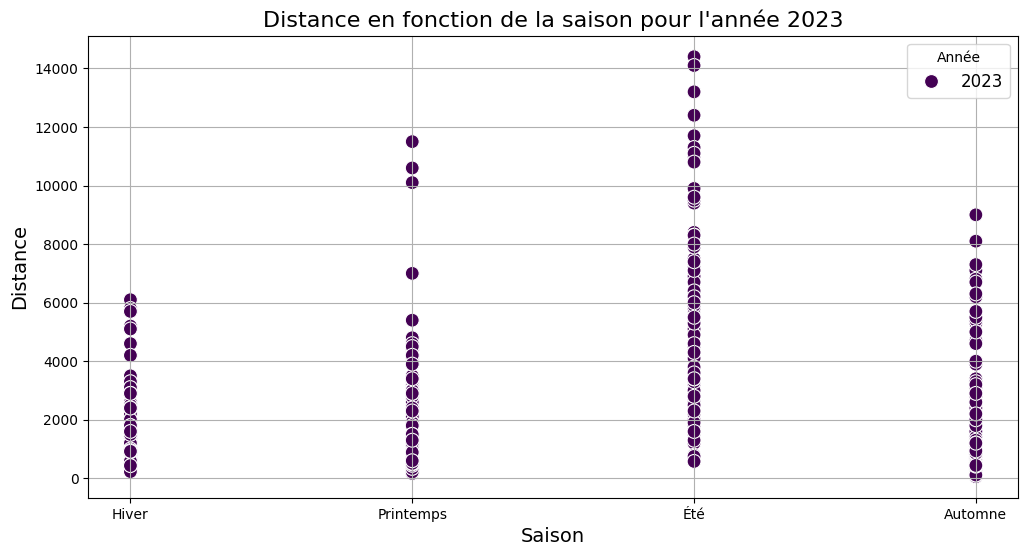

In [21]:
# Filtrer les données pour l'année 2023
cleaned_df_2023 = cleaned_df[cleaned_df['year'] == 2023]

# Visualisation des données pour 2023
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_df_2023, x='season', y='distance', hue='year', palette='viridis', s=100)

# Ajouter des détails au graphique
plt.title('Distance en fonction de la saison pour l\'année 2023', fontsize=16)
plt.xlabel('Saison', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.legend(title='Année', fontsize=12)
plt.grid(True)
plt.show()

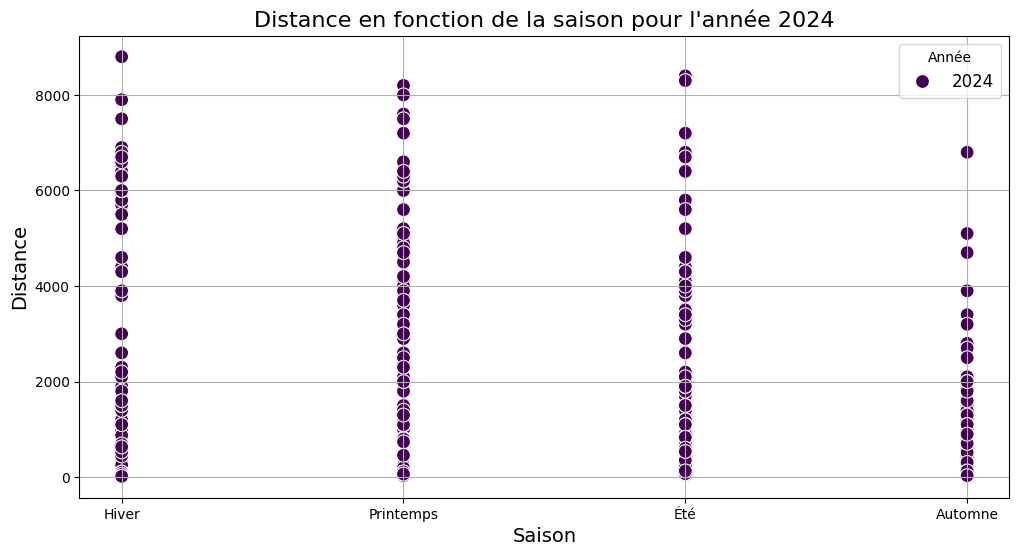

In [22]:
# Filtrer les données pour l'année 2024
cleaned_df_2024 = cleaned_df[cleaned_df['year'] == 2024]

# Visualisation des données pour 2024
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_df_2024, x='season', y='distance', hue='year', palette='viridis', s=100)

# Ajouter des détails au graphique
plt.title('Distance en fonction de la saison pour l\'année 2024', fontsize=16)
plt.xlabel('Saison', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.legend(title='Année', fontsize=12)
plt.grid(True)
plt.show()

### Comparaison des distances entre la même saison au cours de toute la période

/tmp/ipykernel_2340/1303061390.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['winter'] = cleaned_df['day'].apply(assign_winter)
/tmp/ipykernel_2340/1303061390.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_winter, x='winter', y='distance', palette='cool')


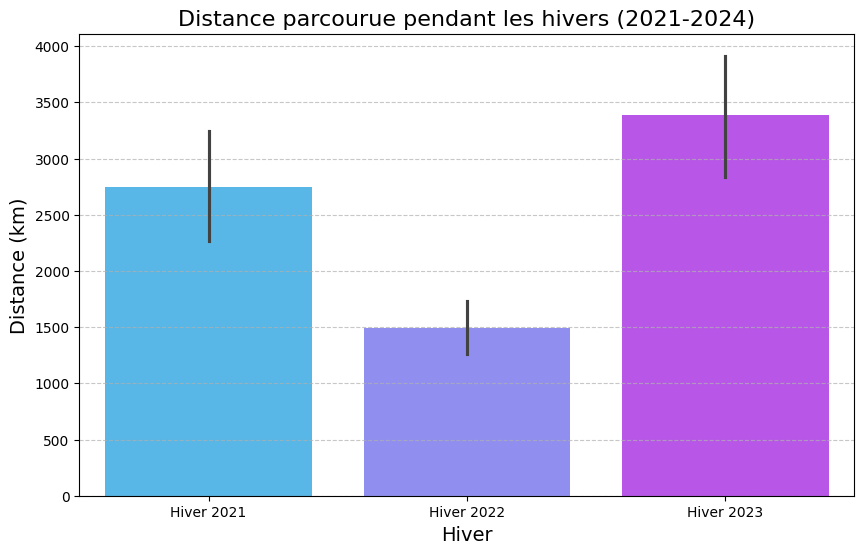

In [23]:
# Filtrer les données pour les hivers 2021-2024
winter_periods = {
    'Hiver 2021': (datetime(2021, 12, 21), datetime(2022, 3, 20)),
    'Hiver 2022': (datetime(2022, 12, 21), datetime(2023, 3, 20)),
    'Hiver 2023': (datetime(2023, 12, 21), datetime(2024, 3, 20)),
    'Hiver 2024': (datetime(2024, 12, 21), datetime(2025, 3, 20))
}

# Ajouter une colonne pour l'hiver correspondant
def assign_winter(day):
    for winter, (start, end) in winter_periods.items():
        if start <= day <= end:
            return winter
    return None

cleaned_df['winter'] = cleaned_df['day'].apply(assign_winter)

# Filtrer uniquement les données des hivers
df_winter = cleaned_df.dropna(subset=['winter'])

# Visualiser les distances parcourues pendant chaque hiver
plt.figure(figsize=(10, 6))
sns.barplot(data=df_winter, x='winter', y='distance', palette='cool')

# Ajouter des détails au graphique
plt.title('Distance parcourue pendant les hivers (2021-2024)', fontsize=16)
plt.xlabel('Hiver', fontsize=14)
plt.ylabel('Distance (km)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Distribution des saisons en fonction des années

/tmp/ipykernel_2340/26950482.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['season'] = cleaned_df['day'].apply(assign_season)


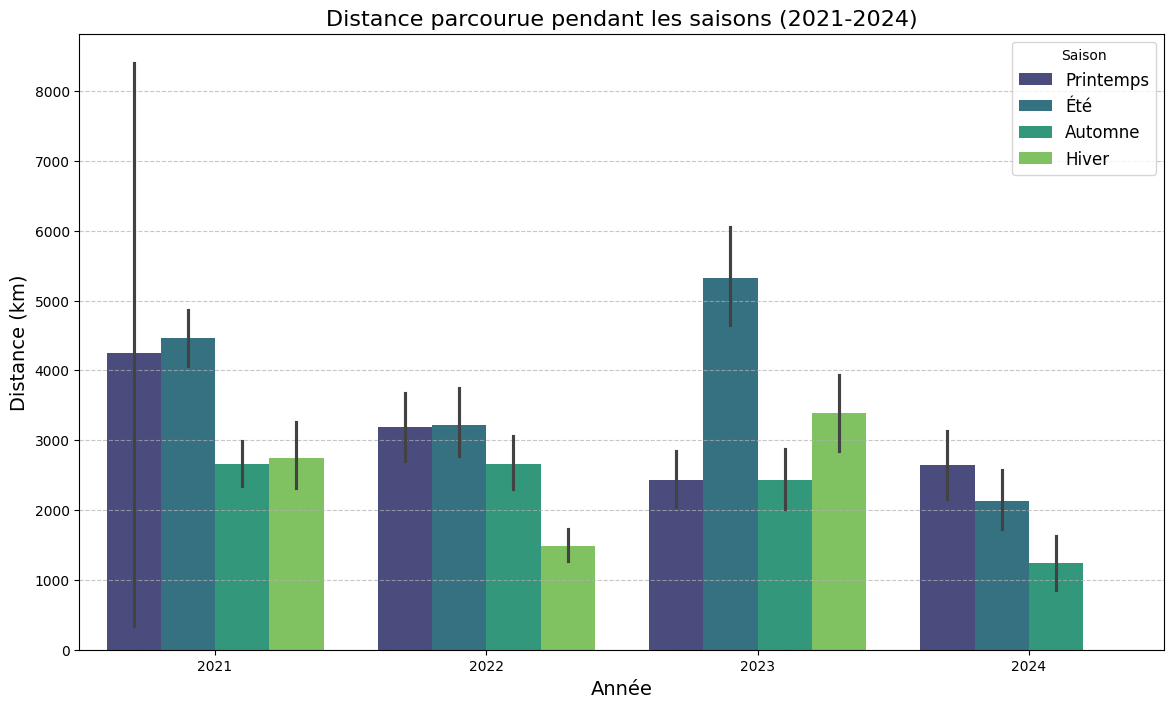

In [24]:
# Définir les périodes pour chaque saison
seasons_periods = {
    'Hiver': [(datetime(year, 12, 21), datetime(year + 1, 3, 20)) for year in range(2021, 2025)],
    'Printemps': [(datetime(year, 3, 21), datetime(year, 6, 20)) for year in range(2021, 2025)],
    'Été': [(datetime(year, 6, 21), datetime(year, 9, 20)) for year in range(2021, 2025)],
    'Automne': [(datetime(year, 9, 21), datetime(year, 12, 20)) for year in range(2021, 2025)],
}

# Ajouter une colonne pour la saison correspondante
def assign_season(day):
    for season, periods in seasons_periods.items():
        for start, end in periods:
            if start <= day <= end:
                return f"{season} {start.year}"
    return None

cleaned_df['season'] = cleaned_df['day'].apply(assign_season)

# Filtrer uniquement les données avec une saison attribuée
df_season = cleaned_df.dropna(subset=['season'])

# Extraire la saison et l'année pour un affichage clair
df_season['season_label'] = df_season['season'].str.split().str[0]
df_season['year'] = df_season['season'].str.split().str[1]

# Visualisation des distances par saison et par année
plt.figure(figsize=(14, 8))
sns.barplot(data=df_season, x='year', y='distance', hue='season_label', palette='viridis')

# Ajouter des détails au graphique
plt.title('Distance parcourue pendant les saisons (2021-2024)', fontsize=16)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Distance (km)', fontsize=14)
plt.legend(title='Saison', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Box plots

/tmp/ipykernel_2340/457874014.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_df, x='season', y='distance', palette=season_year_palette)


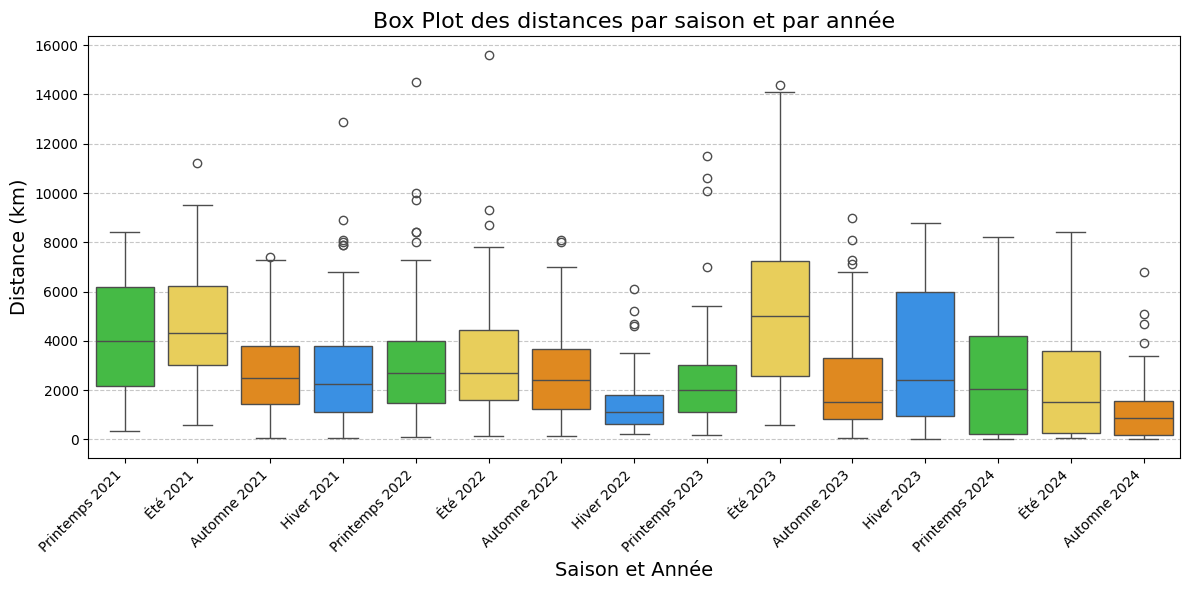

In [45]:
# Créer une colonne combinée pour la saison et l'année
#cleaned_df['season_year'] = cleaned_df['season'] + ' ' + cleaned_df['day'].dt.year.astype(str)
#cleaned_df['season'] = cleaned_df['day'].apply(assign_season)

# Palette de couleurs pour les saisons
season_colors = {
    'Été': '#FFDD44',       # Jaune
    'Hiver': '#1E90FF',     # Bleu
    'Automne': '#FF8C00',   # Orange
    'Printemps': '#32CD32'  # Vert
}

# Associer une couleur à chaque saison, indépendamment de l'année
season_year_palette = {
    season_year: season_colors[season] 
    for season_year in cleaned_df['season'].unique()
    for season in season_colors if season in season_year
}

# Visualiser les données avec les couleurs par saison
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_df, x='season', y='distance', palette=season_year_palette)
plt.title('Box Plot des distances par saison et par année', fontsize=16)
plt.xlabel('Saison et Année', fontsize=14)
plt.ylabel('Distance (km)', fontsize=14)

# Rotation des labels pour éviter qu'ils se chevauchent
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [47]:
# Créer une colonne combinée pour la saison et l'année
cleaned_df.head()

,day,distance,season,year,winter
0,2021-06-18,333.0,Printemps 2021,2021,None
1,2021-06-19,8400.0,Printemps 2021,2021,None
2,2021-06-20,4000.0,Printemps 2021,2021,None
3,2021-06-21,4900.0,Été 2021,2021,None
4,2021-06-22,640.0,Été 2021,2021,None


# Options pour traiter les données aberrantes

### a) Les conserver
Si les valeurs sont justifiables ou représentent une partie importante des données (par exemple, des cas extrêmes mais valides), ne pas les supprimer.

**Exemples :** revenus très élevés, records sportifs.

### b) Les supprimer
Si les *outliers* sont des erreurs de mesure ou des anomalies qui faussent l'analyse, ils peuvent être supprimés.

```python
# Calcul des limites
Q1 = cleaned_df['distance'].quantile(0.25)
Q3 = cleaned_df['distance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les valeurs aberrantes
cleaned_df = cleaned_df[(cleaned_df['distance'] >= lower_bound) & (cleaned_df['distance'] <= upper_bound)]
```

### c) Les remplacer (imputation)
Remplacez les valeurs aberrantes par des valeurs calculées (par exemple, moyenne, médiane, ou borne la plus proche).

```python
# Remplacer les valeurs aberrantes par la borne
cleaned_df['distance'] = cleaned_df['distance'].apply(
    lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
)
```

### d) Transformer les données
Utilisez des transformations mathématiques pour réduire l'effet des valeurs extrêmes.

**Exemples :**
- **Logarithme** : utile pour réduire la variance.
- **Racine carrée** : réduit les écarts importants.

```python
# Transformation logarithmique
cleaned_df['distance_log'] = np.log1p(cleaned_df['distance'])  # log(1 + x) pour éviter log(0)
```

---

### 3. Analyser les outliers avant de les traiter
Avant d'agir sur les *outliers*, examinez-les pour comprendre leur origine :
- Vérifiez les erreurs de saisie (exemple : une distance de 1,000,000 km peut être une erreur).
- Analysez leur contexte : sont-ils cohérents avec les autres observations ou s'agit-il d'anomalies ?

---

### 4. Visualiser après traitement
Une fois les *outliers* traités, visualisez à nouveau les données pour vérifier les résultats.

```python
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_df, x='season', y='distance', palette='Set3')
plt.title('Box Plot après traitement des données aberrantes', fontsize=16)
plt.show()
```

---

### 5. Approches avancées pour détecter les *outliers*
Pour des cas complexes, utilisez des algorithmes comme :
- **DBSCAN** (clustering)
- **Isolation Forest** (modèles basés sur arbres)
- **Local Outlier Factor (LOF)** (analyse locale).


In [49]:
# Transformation logarithmique
cleaned_df['distance_log'] = np.log1p(cleaned_df['distance'])  # log(1 + x) pour éviter log(0)

/tmp/ipykernel_2340/1242056355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['distance_log'] = np.log1p(cleaned_df['distance'])  # log(1 + x) pour éviter log(0)


In [50]:
cleaned_df.head()

,day,distance,season,year,winter,distance_log
0,2021-06-18,333.0,Printemps 2021,2021,None,5.811141
1,2021-06-19,8400.0,Printemps 2021,2021,None,9.036106
2,2021-06-20,4000.0,Printemps 2021,2021,None,8.294300
3,2021-06-21,4900.0,Été 2021,2021,None,8.497195
4,2021-06-22,640.0,Été 2021,2021,None,6.463029


/tmp/ipykernel_2340/1181171417.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_df, x='season', y='distance_log', palette=season_year_palette)


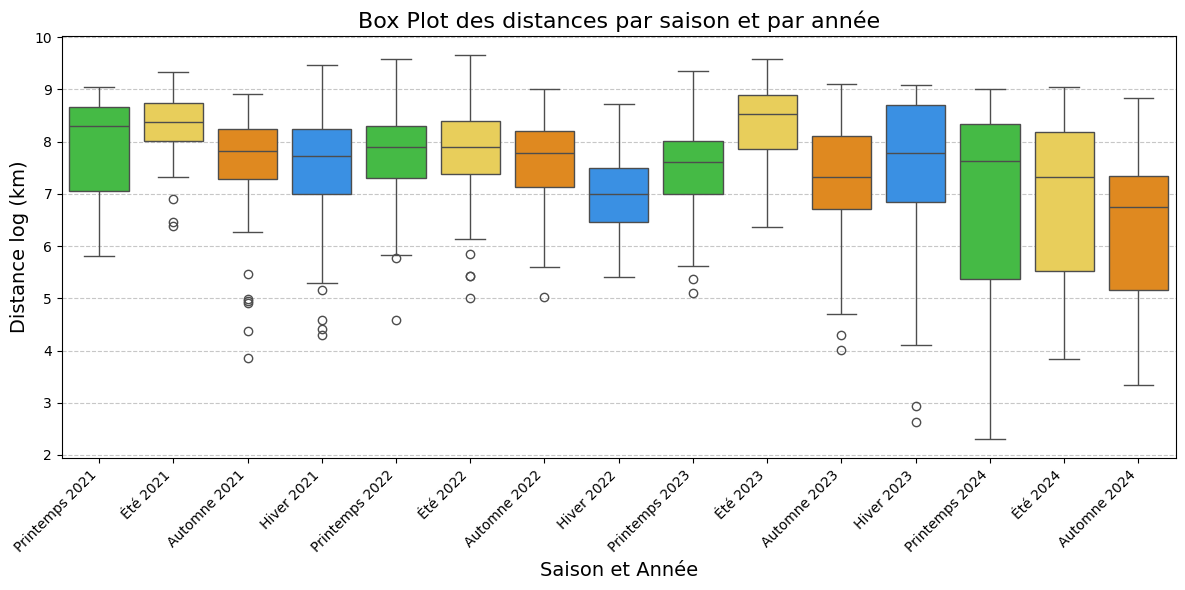

In [51]:
# Palette de couleurs pour les saisons
season_colors = {
    'Été': '#FFDD44',       # Jaune
    'Hiver': '#1E90FF',     # Bleu
    'Automne': '#FF8C00',   # Orange
    'Printemps': '#32CD32'  # Vert
}

# Associer une couleur à chaque saison, indépendamment de l'année
season_year_palette = {
    season_year: season_colors[season] 
    for season_year in cleaned_df['season'].unique()
    for season in season_colors if season in season_year
}

# Visualiser les données avec les couleurs par saison
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_df, x='season', y='distance_log', palette=season_year_palette)
plt.title('Box Plot des distances par saison et par année', fontsize=16)
plt.xlabel('Saison et Année', fontsize=14)
plt.ylabel('Distance log (km)', fontsize=14)

# Rotation des labels pour éviter qu'ils se chevauchent
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [53]:
# Appliquer la transformation racine carrée
cleaned_df['sqrt_distance'] = np.sqrt(cleaned_df['distance'])
cleaned_df.head()

/tmp/ipykernel_2340/1952952224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['sqrt_distance'] = np.sqrt(cleaned_df['distance'])


,day,distance,season,year,winter,distance_log,sqrt_distance
0,2021-06-18,333.0,Printemps 2021,2021,None,5.811141,18.248288
1,2021-06-19,8400.0,Printemps 2021,2021,None,9.036106,91.651514
2,2021-06-20,4000.0,Printemps 2021,2021,None,8.294300,63.245553
3,2021-06-21,4900.0,Été 2021,2021,None,8.497195,70.000000
4,2021-06-22,640.0,Été 2021,2021,None,6.463029,25.298221


/tmp/ipykernel_2340/3677970107.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_df, x='season', y='sqrt_distance', palette=season_year_palette)


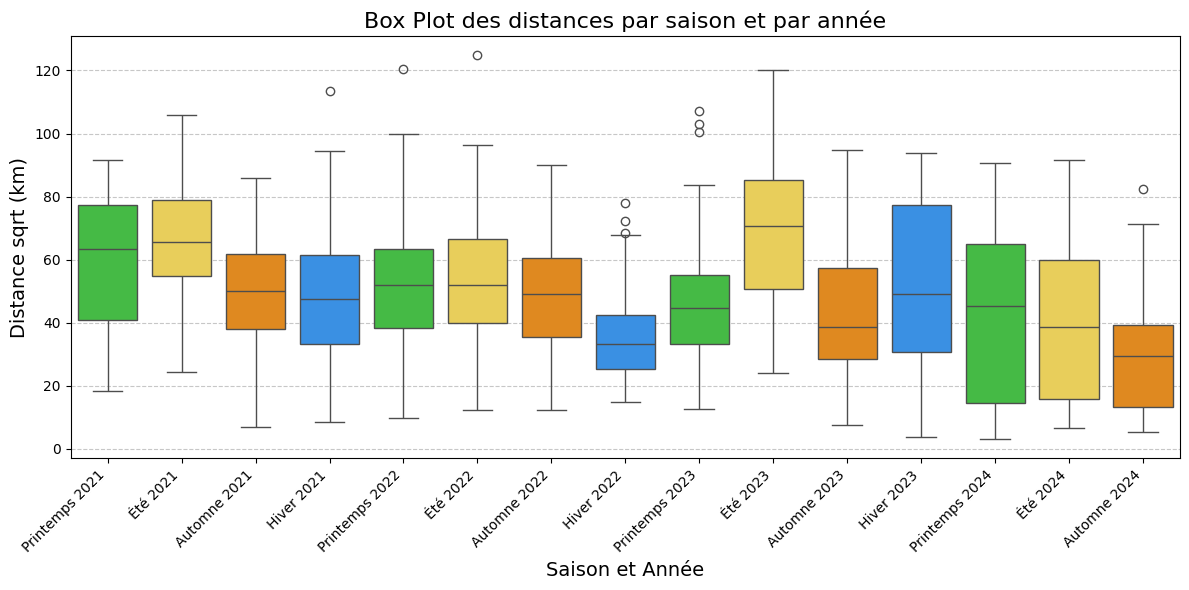

In [54]:
# Palette de couleurs pour les saisons
season_colors = {
    'Été': '#FFDD44',       # Jaune
    'Hiver': '#1E90FF',     # Bleu
    'Automne': '#FF8C00',   # Orange
    'Printemps': '#32CD32'  # Vert
}

# Associer une couleur à chaque saison, indépendamment de l'année
season_year_palette = {
    season_year: season_colors[season] 
    for season_year in cleaned_df['season'].unique()
    for season in season_colors if season in season_year
}

# Visualiser les données avec les couleurs par saison
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_df, x='season', y='sqrt_distance', palette=season_year_palette)
plt.title('Box Plot des distances par saison et par année', fontsize=16)
plt.xlabel('Saison et Année', fontsize=14)
plt.ylabel('Distance sqrt (km)', fontsize=14)

# Rotation des labels pour éviter qu'ils se chevauchent
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Comparaison entre Log et Racine Carrée

| **Critère**                         | **Transformation Logarithmique**                           | **Transformation Racine Carrée**                          |
|-------------------------------------|------------------------------------------------------------|-----------------------------------------------------------|
| **Nature des données**              | Données avec des valeurs très dispersées, souvent asymétriques à droite (distributions en longue traîne). | Données avec une légère asymétrie ou des valeurs modérées. |
| **Échelle des valeurs**             | Compresse fortement les valeurs extrêmes.                  | Réduit les valeurs extrêmes mais de façon moins intense.   |
| **Sensibilité aux valeurs faibles** | Moins sensible aux petites valeurs, nécessite des valeurs strictement positives. | Sensible aux petites valeurs, mais l'effet est plus doux. |
| **Exemples d'application**          | Revenus, taille des entreprises, populations de grandes villes. | Comptages, mesures physiques comme la taille ou la vitesse.|
| **Quand ne pas l'utiliser**         | Lorsque les données contiennent des valeurs nulles ou négatives sans traitement préalable. | Lorsque les valeurs sont déjà proches de zéro.             |




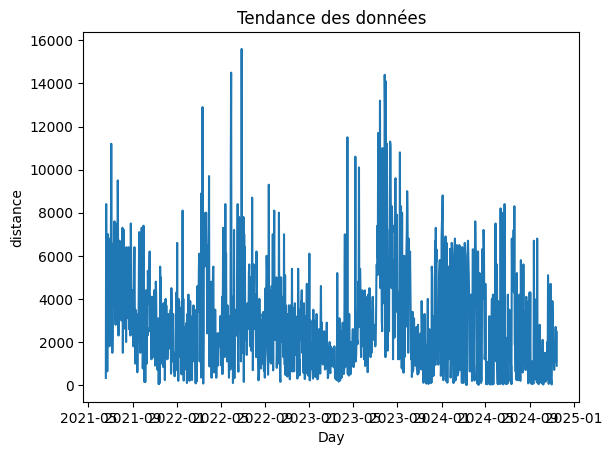

In [55]:
import matplotlib.pyplot as plt

# Exemple de séries temporelles
plt.plot(cleaned_df['day'], cleaned_df['distance'])
plt.title('Tendance des données')
plt.xlabel('Day')
plt.ylabel('distance')
plt.show()


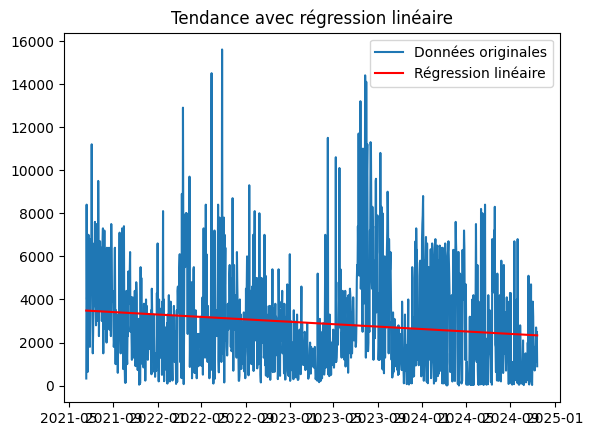

In [60]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

df = cleaned_df

# Convertir la colonne 'day' en nombre de jours depuis la première date
df['date_num'] = (df['day'] - df['day'].min()).dt.days

# Utiliser les colonnes 'date_num' et 'day' comme caractéristiques
# Assurez-vous que 'day' est également converti en nombre si nécessaire
df['day_num'] = (df['day'] - df['day'].min()).dt.days  # Ajouter cette ligne pour convertir 'day' en un nombre

# Construire X avec des variables numériques
X = df[['date_num', 'day_num']].values  # Utilisez 'day_num' ici au lieu de 'day'
y = df['distance'].values

model = LinearRegression()
model.fit(X, y)

# Tracer la ligne de régression en utilisant les données originales et prédites
plt.plot(df['day'], y, label='Données originales')

# Pour afficher la régression, nous devons d'abord prédire les valeurs
y_pred = model.predict(X)
plt.plot(df['day'], y_pred, label='Régression linéaire', color='red')

plt.legend()
plt.title('Tendance avec régression linéaire')
plt.show()


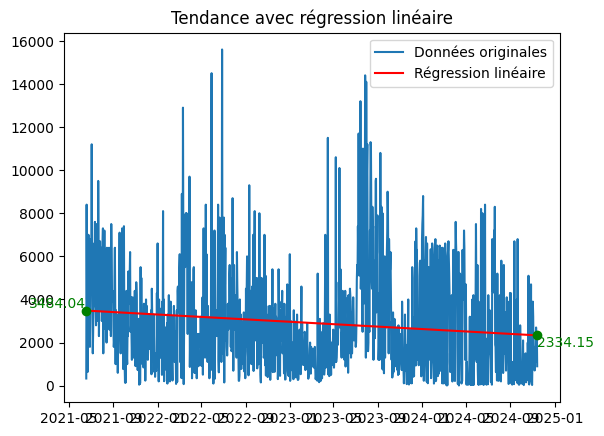

In [62]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

df = cleaned_df

# Convertir la colonne 'day' en nombre de jours depuis la première date
df['date_num'] = (df['day'] - df['day'].min()).dt.days

# Utiliser les colonnes 'date_num' et 'day' comme caractéristiques
# Assurez-vous que 'day' est également converti en nombre si nécessaire
df['day_num'] = (df['day'] - df['day'].min()).dt.days  # Ajouter cette ligne pour convertir 'day' en un nombre

# Construire X avec des variables numériques
X = df[['date_num', 'day_num']].values  # Utilisez 'day_num' ici au lieu de 'day'
y = df['distance'].values

model = LinearRegression()
model.fit(X, y)

# Tracer la ligne de régression en utilisant les données originales et prédites
plt.plot(df['day'], y, label='Données originales')

# Pour afficher la régression, nous devons d'abord prédire les valeurs
y_pred = model.predict(X)
plt.plot(df['day'], y_pred, label='Régression linéaire', color='red')

# Ajouter les valeurs de la distance correspondant au début et à la fin de la droite de régression
# Calculer les prédictions pour le début et la fin de la période
start_day_num = df['day_num'].min()  # Jour numéro de départ
end_day_num = df['day_num'].max()    # Jour numéro de fin

start_distance = model.predict([[start_day_num, start_day_num]])  # Prédiction pour le début
end_distance = model.predict([[end_day_num, end_day_num]])        # Prédiction pour la fin

# Tracer les points correspondants sur le graphique
plt.scatter([df['day'].min(), df['day'].max()], [start_distance, end_distance], color='green', zorder=5)
plt.text(df['day'].min(), start_distance, f'{start_distance[0]:.2f}', color='green', ha='right', va='bottom')
plt.text(df['day'].max(), end_distance, f'{end_distance[0]:.2f}', color='green', ha='left', va='top')

plt.legend()
plt.title('Tendance avec régression linéaire')
plt.show()
